In [1]:
import sys

sys.path.append("../../")

from astronn.datasets import deltascuti, bedding, corot, starmodels
from astronn.utils import inferences
from astronn.utils.metrics import *
from astronn import models

import tensorflow as tf
tf.autograph.set_verbosity(0)
from tensorflow import keras

import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


#### Load stars datasets

In [2]:
# Read dataset with astroseismology info (dft, ac, hod, ...)
df_ds = deltascuti()
df_delta_scuti = df_ds.load(
    "../../astronn/data/deltascuti/preprocessed/*", batch_size=1
)

# Read csv with other phisical paramters (L, Teff, ..)
csv_delta_scuti = pd.read_csv("../data/deltascuti/binaries_obs.csv")
print(csv_delta_scuti)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
              ID  Dnu_muHz          L  Teff  L.Ltot  parallax       mv  \
0     KIC3858884        29  21.520774  6606   0.470    1.7800   9.3360   
1     KIC4544587        74   6.475306  7750   0.332    1.3600  10.8470   
2    KIC10661783        39  29.304625  7764   0.937    1.9400   9.5630   
3       HD172189        19  29.942319  7750   0.702    2.2700   8.8850   
4   CID100866999

In [3]:
# Read dataset with astroseismology info (dft, ac, hod, ...)
bedding_stars = bedding()
df_bedding = bedding_stars.load("../data/bedding/preprocessed/*", batch_size=1)

# Read csv with other phisical paramters (L, Teff, ..)
csv_bedding = pd.io.parsers.read_csv("../data/bedding/bedding_teff_logg_rad.csv", sep=",")
csv_bedding

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


HD             Name         TIC      V    Teff      L  e.L.   rho  \
0     2280.0              NaN   281499618   9.13  7510.0   5.52  0.26  0.49   
1     3622.0              NaN    43363194   7.77  7930.0   7.86  0.35  0.45   
2    10779.0              NaN   229139161   8.78  7730.0   8.13  0.36  0.39   
3    10961.0              NaN   231014033   9.39  7430.0    NaN   NaN   NaN   
4    17341.0              NaN   122615966   9.32  7810.0  10.05  0.50  0.32   
5    17693.0              NaN   122686610   7.80  7880.0  10.21  0.44  0.33   
6    20203.0              NaN   274038922   8.85  7970.0   8.06  0.38  0.45   
7    20232.0              NaN   159895674   6.88  8060.0   8.64  0.36  0.44   
8    24572.0              NaN   242944780   9.45  7410.0   7.25  0.36  0.35   
9    24975.0              NaN    44645679   7.24  7790.0   9.20  0.39  0.35   
10   25248.0              NaN   459942890   8.60     NaN    NaN   NaN   NaN   
11   25369.0              NaN     9147509   9.68     NaN    NaN   NaN   NaN   
12   25674.0              NaN    34197596   8.69  8260.0  10.20  0.50  0.42   
13   28548.0              NaN    71134596   9.22  8510.0  10.82  0.55  0.45   
14   29783.0              NaN   269792989   7.87     NaN    NaN   NaN   NaN   
15   30422.0           EX Eri      589826   6.18  7940.0   8.42  0.35  0.42   
16   31322.0              NaN   246902545   9.28  8260.0  13.19  0.67  0.32   
17   31640.0              NaN   259675399   8.06  7690.0   8.25  0.35  0.37   
18   31901.0              NaN   316920092   9.07  7770.0   7.74  0.39  0.41   
19   32433.0              NaN   348792358   9.22  7700.0   7.32  0.35  0.42   
20   34282.0        V1366 Ori    24344701   9.92     NaN    NaN   NaN   NaN   
21   37286.0           HR1915    31475829   6.26  8080.0   8.18  0.34  0.47   
22   38597.0              NaN   100531058   8.65  8430.0  10.38  0.47  0.44   
23   38629.0              NaN    32763133   8.92  8170.0  11.27  0.53  0.35   
24   39060.0          betaPic   270577175   3.85  8080.0   8.49  0.39  0.45   
25   40317.0              NaN   282265535   8.45  8700.0  10.58  0.55  0.51   
26   42005.0              NaN   408906554   9.54  8030.0   8.75  0.42  0.42   
27   42608.0              NaN    37498433   9.85  8170.0  10.05  0.49  0.40   
28   42915.0              NaN   124429243   9.04  8520.0  12.82  0.68  0.38   
29   44726.0              NaN   150272131  10.38  7890.0   7.87  0.38  0.44   
30   44930.0              NaN    34737955   9.42  7320.0   7.17  0.40  0.33   
31   44958.0          V435Car   255548143   6.74  7660.0   7.82  0.32  0.38   
32   45424.0              NaN   117766204   7.18  8060.0  10.39  0.44  0.36   
33   46722.0              NaN   172193026   9.29  7810.0   8.28  0.40  0.40   
34   48985.0              NaN   148228220   9.04  7710.0  11.60  0.54  0.25   
35   50153.0              NaN    78492107   7.03  7820.0   9.15  0.39  0.36   
36   54711.0              NaN   284348793   9.01  8200.0   9.22  0.45  0.44   
37   55863.0              NaN   294157254   9.06  7650.0   7.80  0.38  0.38   
38   59104.0              NaN   278179191   8.50  7360.0   6.15  0.26  0.41   
39   59594.0          V349Pup   112484997   7.32  7800.0   8.06  0.34  0.40   
40   67688.0              NaN   306773428   7.66     NaN    NaN   NaN   NaN   
41   70510.0              NaN   388351327   6.75     NaN    NaN   NaN   NaN   
42   75040.0              NaN   176400189   9.05     NaN    NaN   NaN   NaN   
43   78198.0              NaN   332516661   9.50  7340.0   7.79  0.42  0.31   
44   89263.0           HR4043   463556278   6.22     NaN    NaN   NaN   NaN   
45   99506.0              NaN   287347434   8.36  7970.0   7.58  0.37  0.48   
46  220811.0              NaN   327996759   6.91     NaN    NaN   NaN   NaN   
47  222496.0              NaN   316806320   9.48     NaN    NaN   NaN   NaN   
48  223011.0              NaN   224284988   6.32  7830.0  10.49  0.44  0.31   
49  290750.0              NaN    11199304   9.77  9170.0  19

### Load pretrainned NN model

In [4]:
sepconv_mod = tf.keras.models.load_model(
    "/home/roberto/Projects/best_train/sepconvnn_tmp_dos_200/"
)
sepconv_mod.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 351, 10)           1010      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 342, 10)           1010      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 68, 10)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 68, 10)            40        
_________________________________________________________________
flatten (Flatten)            (None, 680)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               68100     
Total params: 70,160
Trainable params: 70,140
Non-trainable params: 20
___________________________________________________

### Load $\rho$ Roche models

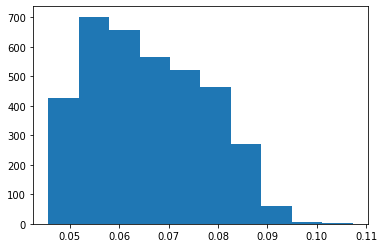

In [5]:
models = pd.read_csv(
    "/home/roberto/Downloads/evolutionTracks_line_rho_roche/models_params.csv",
    header=None,
    names=["Teff", "Dnu", "L_must", "rho_roche"],
)


def get_avg_rho_roche(teff, l, e_teff=600, e_l=5):
    """
    """
    id_teff = models["Teff"].between(teff - e_teff, teff + e_teff, inclusive=True)
    id_l = models["L_must"].between(l - e_l, l + e_l, inclusive=True)
    return models[(id_teff & id_l)]["rho_roche"]


plt.hist(get_avg_rho_roche(8320.860521, 66))
plt.show()

## Results for 11 Binary DS Stars

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


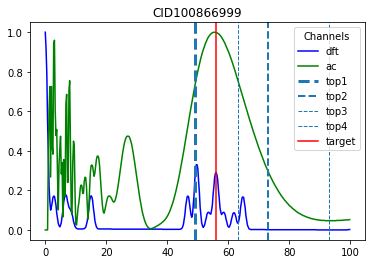

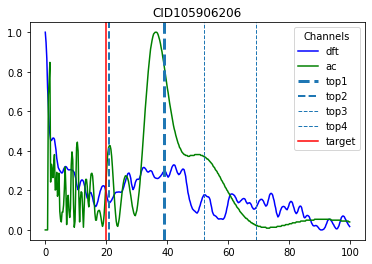

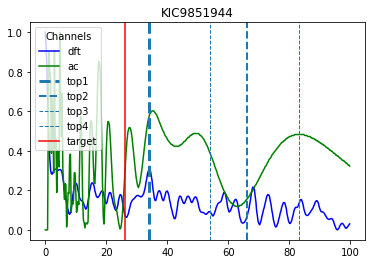

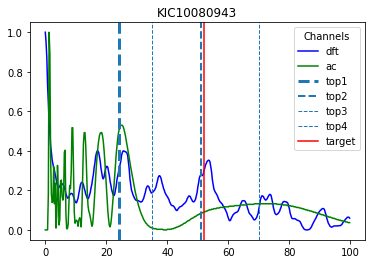

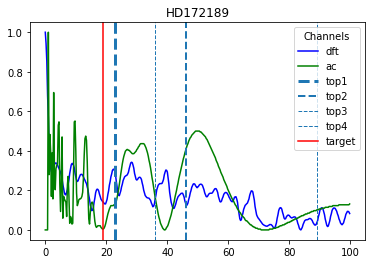

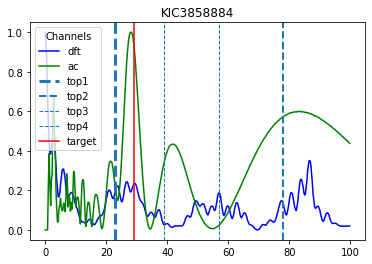

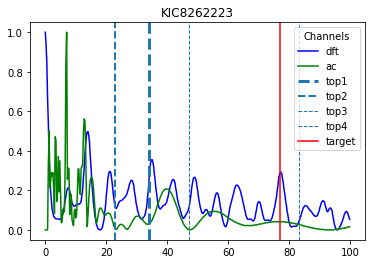

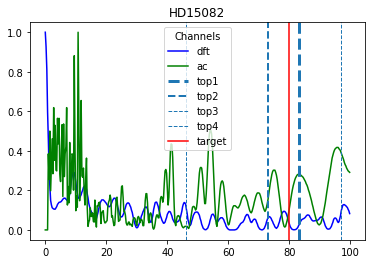

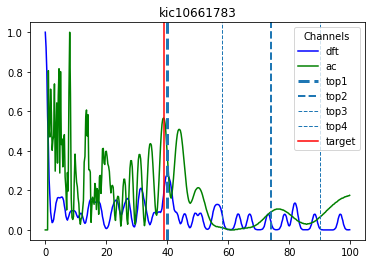

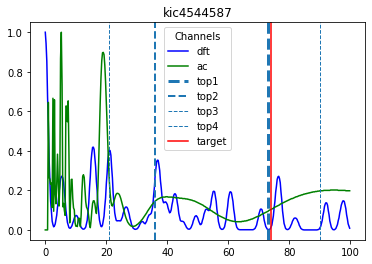

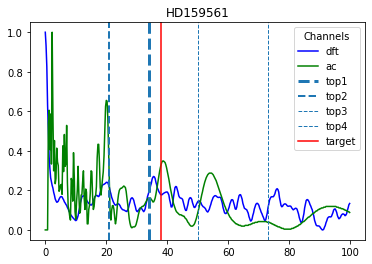

In [6]:
inf = inferences()
df_results_delta_scuti = inf.get_processed_inferences(
    nn_model=sepconv_mod,
    df_stars=df_delta_scuti,
    take_number=11,
    csv_L=csv_delta_scuti,
    debug=True,
)
df_results_delta_scuti.id = df_results_delta_scuti.id.str.upper()

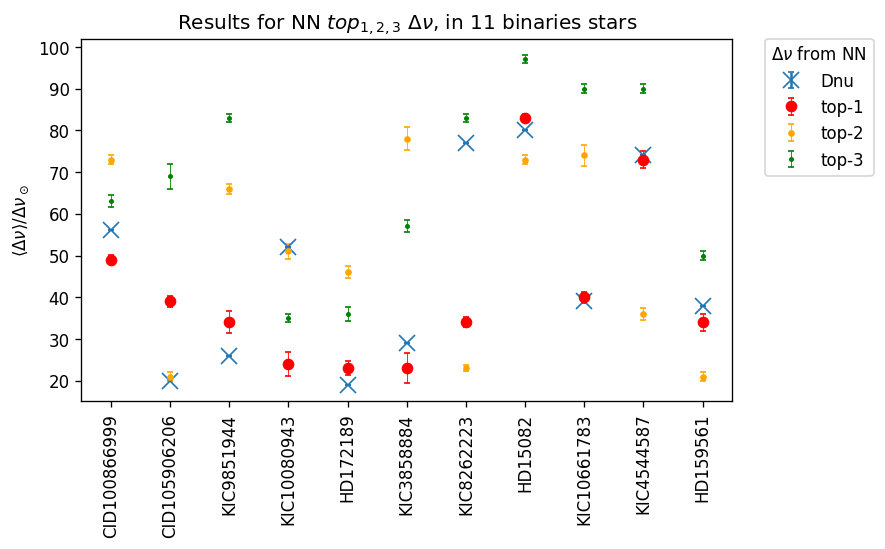

In [7]:
inf.plot_inferences(
    df_results_delta_scuti,
    plot_title="Results for NN $top_{1,2,3}$ $\Delta\\nu$, in 11 binaries stars",
    plot_size=(7, 4),
)

In [8]:
df_results_delta_scuti_merged = df_results_delta_scuti.merge(csv_delta_scuti , left_on="id", right_on="ID", how="left").drop('ID', 1)
df_results_delta_scuti_merged

id dnu-target top1    e-top1 top2    e-top2 top3    e-top3 top4  \
0   CID100866999         56   49  1.044763   73  1.029168   63  1.455164   93   
1   CID105906206         20   39  1.229034   21  1.178451   69  2.962202   52   
2     KIC9851944         26   34  2.605530   66  1.189474   83  1.003733   54   
3    KIC10080943         52   24  2.963901   51  1.824679   35  0.926366   70   
4       HD172189         19   23  1.634795   46  1.377856   36  1.718467   89   
5     KIC3858884         29   23  3.613644   78  2.693781   57  1.409748   39   
6     KIC8262223         77   34  1.161095   23  0.757434   83  1.005299   47   
7        HD15082         80   83  1.011470   73  1.015208   97  0.954947   46   
8    KIC10661783         39   40  1.297765   74  2.518126   90  1.087349   58   
9     KIC4544587         74   73  1.929718   36  1.490254   90  1.030482   21   
10      HD159561         38   34  2.024747   21  1.064188   50  1.013231   73   

      e-top4  ...  e-rho-top3   rho-top4 e-rho-top4  Dnu_muHz          L  \
0   0.980278  ...    0.108163   0.755931   0.236542        56   3.865000   
1   1.141167  ...    0.129821     0.2336   0.073637        20   9.396579   
2   1.387807  ...    0.188156   0.252105   0.079417        26  60.062351   
3   1.046125  ...    0.033382   0.425838   0.133625        52   7.085301   
4   1.336333  ...    0.035312   0.691694   0.216514        19  29.942319   
5   1.314869  ...    0.088501   0.130646   0.041429        29  21.520774   
6   1.311323  ...    0.188156   0.190451   0.060151        77   5.139949   
7   1.144795  ...    0.257471   0.182355   0.057618        80   6.140000   
8   1.154284  ...    0.221437   0.291253   0.091640        39  29.304625   
9   1.116072  ...    0.221437  0.0374136   0.012076        74   6.475306   
10  1.730440  ...    0.068077   0.463509   0.145372        38  24.642612   

    Teff L.Ltot  parallax       mv  rho-gh17  
0   7300    NaN    0.5654  15.0970   0.26000  
1   6750  0.940    0.9901  12.2620   0.02986  
2   6902  0.500    0.4100  11.4770   0.05660  
3   7480  0.500    1.0600  11.7350   0.20500  
4   7750  0.702    2.2700   8.8850   0.02830  
5   6606  0.470    1.7800   9.3360   0.06570  
6   9128  0.900    0.9832  12.8850   0.42300  
7   7430  0.000    0.0000   0.0000   0.50700  
8   7764  0.937    1.9400   9.5630   0.12550  
9   7750  0.332    1.3600  10.8470   0.41400  
10  8047  1.000   67.1300   2.1262   0.12400  

[11 rows x 29 columns]

In [9]:
df_results_delta_scuti_merged["avg_rho_roche"] = df_results_delta_scuti_merged[
    ["Teff", "L"]
].apply(lambda x: np.median(get_avg_rho_roche(x["Teff"], x["L"])), axis=1)
df_results_delta_scuti_merged

/home/roberto/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/roberto/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


id dnu-target top1    e-top1 top2    e-top2 top3    e-top3 top4  \
0   CID100866999         56   49  1.044763   73  1.029168   63  1.455164   93   
1   CID105906206         20   39  1.229034   21  1.178451   69  2.962202   52   
2     KIC9851944         26   34  2.605530   66  1.189474   83  1.003733   54   
3    KIC10080943         52   24  2.963901   51  1.824679   35  0.926366   70   
4       HD172189         19   23  1.634795   46  1.377856   36  1.718467   89   
5     KIC3858884         29   23  3.613644   78  2.693781   57  1.409748   39   
6     KIC8262223         77   34  1.161095   23  0.757434   83  1.005299   47   
7        HD15082         80   83  1.011470   73  1.015208   97  0.954947   46   
8    KIC10661783         39   40  1.297765   74  2.518126   90  1.087349   58   
9     KIC4544587         74   73  1.929718   36  1.490254   90  1.030482   21   
10      HD159561         38   34  2.024747   21  1.064188   50  1.013231   73   

      e-top4  ...   rho-top4  e-rho-top4 Dnu_muHz          L  Teff  L.Ltot  \
0   0.980278  ...   0.755931    0.236542       56   3.865000  7300     NaN   
1   1.141167  ...     0.2336    0.073637       20   9.396579  6750   0.940   
2   1.387807  ...   0.252105    0.079417       26  60.062351  6902   0.500   
3   1.046125  ...   0.425838    0.133625       52   7.085301  7480   0.500   
4   1.336333  ...   0.691694    0.216514       19  29.942319  7750   0.702   
5   1.314869  ...   0.130646    0.041429       29  21.520774  6606   0.470   
6   1.311323  ...   0.190451    0.060151       77   5.139949  9128   0.900   
7   1.144795  ...   0.182355    0.057618       80   6.140000  7430   0.000   
8   1.154284  ...   0.291253    0.091640       39  29.304625  7764   0.937   
9   1.116072  ...  0.0374136    0.012076       74   6.475306  7750   0.332   
10  1.730440  ...   0.463509    0.145372       38  24.642612  8047   1.000   

   parallax       mv rho-gh17  avg_rho_roche  
0    0.5654  15.0970  0.26000       0.450353  
1    0.9901  12.2620  0.02986       0.273696  
2    0.4100  11.4770  0.05660            NaN  
3    1.0600  11.7350  0.20500       0.412606  
4    2.2700   8.8850  0.02830       0.102363  
5    1.7800   9.3360  0.06570       0.075878  
6    0.9832  12.8850  0.42300            NaN  
7    0.0000   0.0000  0.50700       0.423199  
8    1.9400   9.5630  0.12550       0.104992  
9    1.3600  10.8470  0.41400       0.445262  
10  67.1300   2.1262  0.12400       0.169625  

[11 rows x 30 columns]

### Histogram of $\rho$ Roche distributions for every single star (11 binary stars)

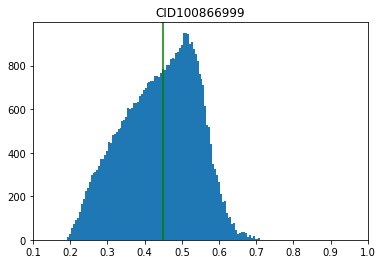

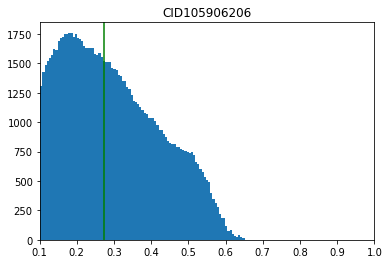

/home/roberto/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/roberto/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


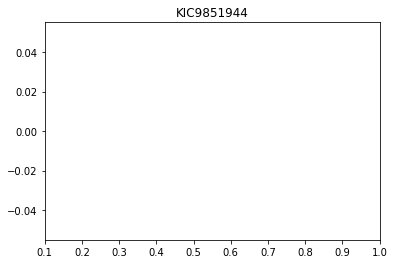

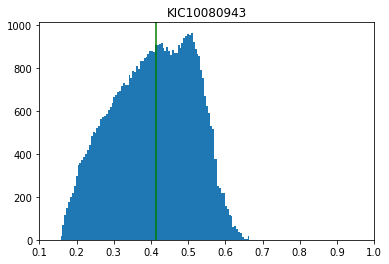

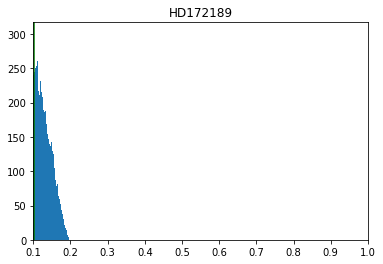

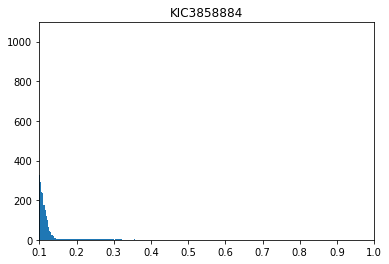

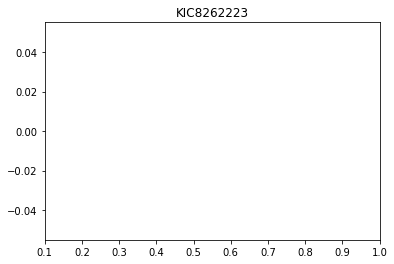

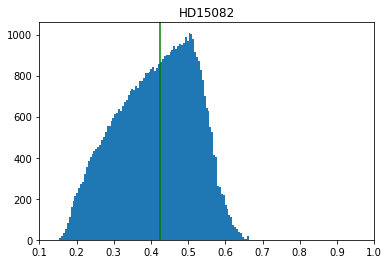

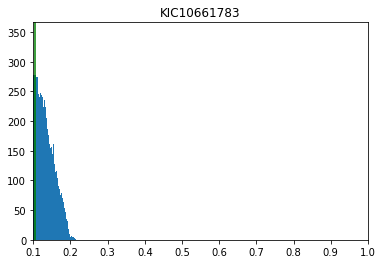

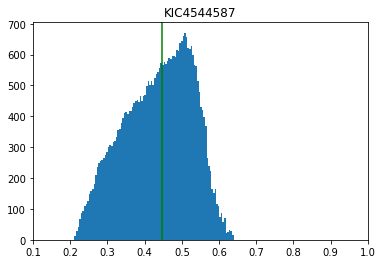

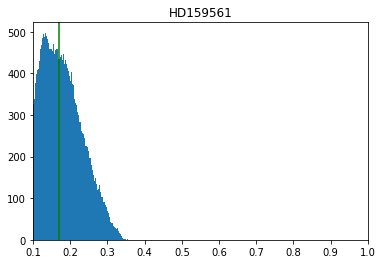

In [10]:
for i, row in df_results_delta_scuti_merged.iterrows():
    avg_rho_roche = np.median(get_avg_rho_roche(row["Teff"], row["L"]))
    plt.hist(get_avg_rho_roche(row["Teff"], row["L"]), bins=100)
    plt.axvline(x=avg_rho_roche, color="green")
    plt.title(row["id"])
    plt.xlim(0.1, 1.0)
    plt.show()

## Multiples of top1/top2 when top2 is requiered

In [11]:
select_closest_top = np.argmin(
    (
        np.power(
            np.asarray(df_results_delta_scuti_merged["dnu-target"])
            - np.asarray(df_results_delta_scuti_merged["top1"]),
            2,
        ),
        np.power(
            np.asarray(df_results_delta_scuti_merged["dnu-target"])
            - np.asarray(df_results_delta_scuti_merged["top2"]),
            2,
        ),
    ),
    axis=0,
)
tops = np.where(
    select_closest_top == 0,
    df_results_delta_scuti_merged["top1"],
    df_results_delta_scuti_merged["top2"],
)
# Show multiples
df_results_delta_scuti_merged.loc[select_closest_top == 1, ["id", "dnu-target", "top1", "top2"]]

id dnu-target top1 top2
1  CID105906206         20   39   21
3   KIC10080943         52   24   51

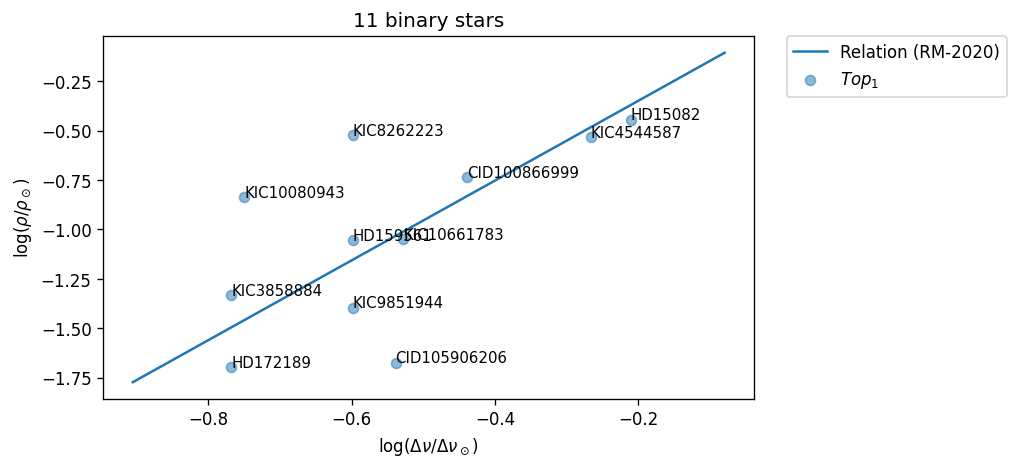

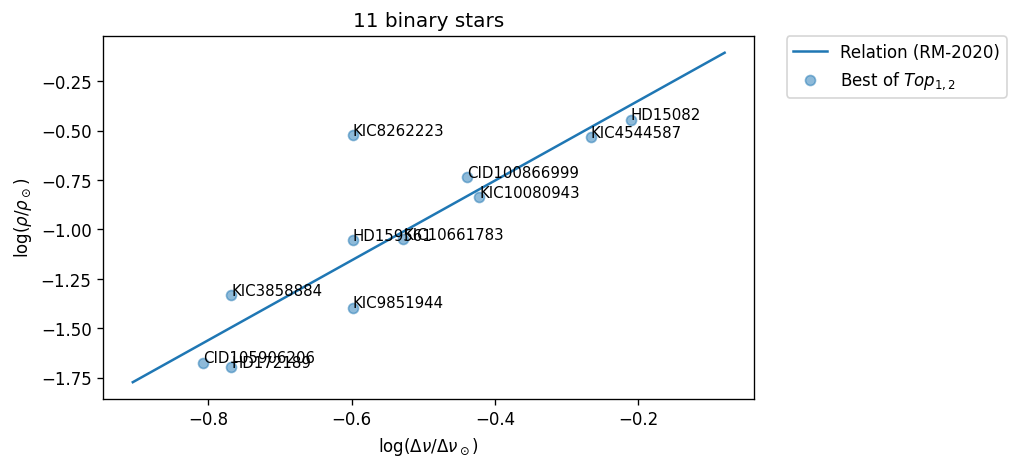

In [12]:
inferences.plot_relation_rodriguez(
    dnus=df_results_delta_scuti_merged["top1"].values.astype(float),
    rhos=df_results_delta_scuti_merged["rho-gh17"].values.astype(float),
    points_ids=df_results_delta_scuti_merged["id"],
    plot_title="11 binary stars",
    points_label="$Top_1$",
)

inferences.plot_relation_rodriguez(
    dnus=tops.astype(float),
    rhos=df_results_delta_scuti_merged["rho-gh17"].values.astype(float),
    points_ids=df_results_delta_scuti_merged["id"],
    plot_title="11 binary stars",
    points_label="Best of $Top_{1,2}$",
)

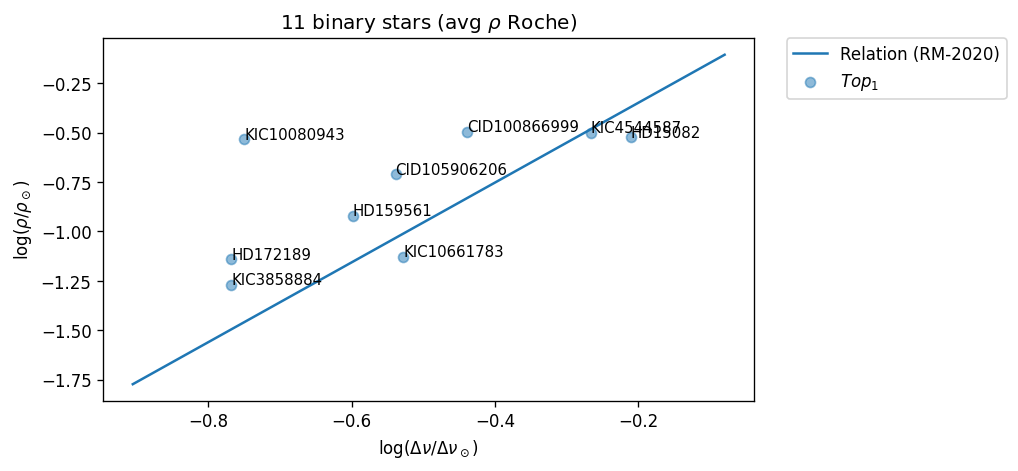

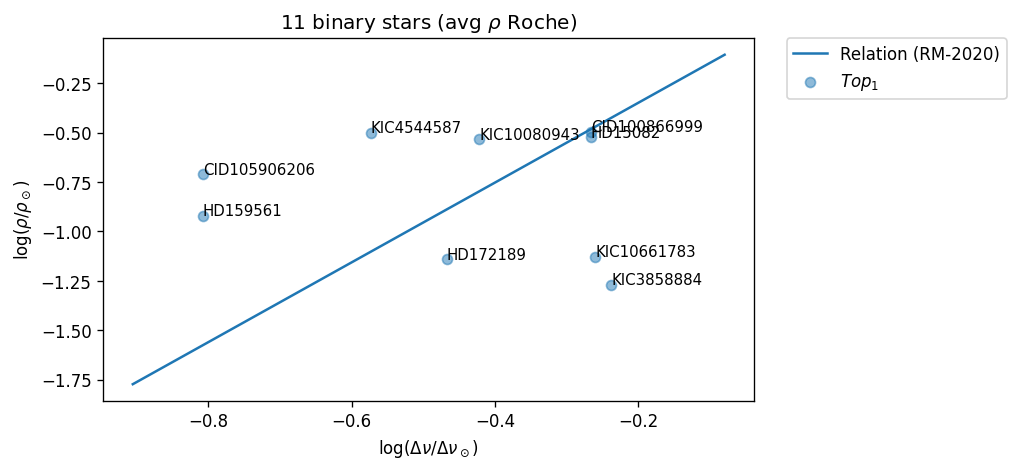

In [13]:
inferences.plot_relation_rodriguez(
    dnus=df_results_delta_scuti_merged["top1"].values.astype(float),
    rhos=df_results_delta_scuti_merged["avg_rho_roche"].values.astype(float),
    points_ids=df_results_delta_scuti_merged["id"],
    plot_title="11 binary stars (avg $\\rho$ Roche)",
    points_label="$Top_1$",
)
inferences.plot_relation_rodriguez(
    dnus=df_results_delta_scuti_merged["top2"].values.astype(float),
    rhos=df_results_delta_scuti_merged["avg_rho_roche"].values.astype(float),
    points_ids=df_results_delta_scuti_merged["id"],
    plot_title="11 binary stars (avg $\\rho$ Roche)",
    points_label="$Top_1$",
)

In [14]:
# df_binary_freqs = pd.read_csv(
#                "../../astronn/data/deltascuti/raw/CID105906206.lis",
#                #"../../astronn/data/bedding/raw/tess2018234235059-s0002-0000000229139161-0121-s_lc_det.dat",
#                sep="\s+",
#                header=None,
#                index_col=False,
#                names=["f", "signif", "a", "V4", "V5", "V6", "V7"],
#            )

## tess2018234235059-s0002-0000000229139161-0121-...	78	40	1.419688	71
# res = echelle(df_binary_freqs[["f"]].values / 0.0864, 20, saveplot = "N")

## Results for 57 Bedding stars


In [15]:
df_results_bedding = inf.get_processed_inferences(
    nn_model=sepconv_mod,
    df_stars=df_bedding,
    take_number=57,
    csv_L=csv_bedding,
    debug=False,
)
df_results_bedding

id dnu-target top1  \
0   tess2018319095959-s0005-0000000306773428-0125-...         81   36   
1   tess2018319095959-s0005-0000000000589826-0125-...         75   36   
2   tess2019032160000-s0008-0000000176400189-0136-...         76   32   
3   tess2018319095959-s0005-0000000349645354-0125-...         61   27   
4   tess2018349182459-s0006-0000000011361473-0126-...         87   44   
5   tess2018319095959-s0005-0000000100531058-0125-...         79   38   
6   tess2018349182459-s0006-0000000117766204-0126-...         75   37   
7   tess2018319095959-s0005-0000000255548143-0125-...         79   75   
8   tess2018349182459-s0006-0000000148228220-0126-...         83   81   
9   tess2018319095959-s0005-0000000246902545-0125-...         70   33   
10  tess2018263035959-s0003-0000000159895674-0123-...         79   75   
11  tess2018349182459-s0006-0000000282265535-0126-...         80   75   
12  tess2018263035959-s0003-0000000043363194-0123-...         79   77   
13  tess2018263035959-s0003-0000000231014033-0123-...         84   37   
14  tess2018319095959-s0005-0000000259675399-0125-...         74   30   
15  tess2018319095959-s0005-0000000044645679-0125-...         72   39   
16  tess2019169103026-s0013-0000000269792989-0146-...         78   71   
17  tess2019032160000-s0008-0000000340358522-0136-...         82   38   
18  tess2018319095959-s0005-0000000316920092-0125-...         80   35   
19  tess2018234235059-s0002-0000000281499618-0121-...         82   69   
20  tess2018234235059-s0002-0000000327996759-0121-...         69   42   
21  tess2018292075959-s0004-0000000274038922-0124-...         83   81   
22  tess2018319095959-s0005-0000000348792358-0125-...         80   36   
23  tess2018319095959-s0005-0000000024344701-0125-...         85   79   
24  tess2018234235059-s0002-0000000229139161-0121-...         78   40   
25  tess2018319095959-s0005-0000000031475829-0125-...         84   40   
26  tess2018349182459-s0006-0000000294157254-0126-...         80   74   
27  tess2019058134432-s0009-0000000388351327-0139-...         82   73   
28  tess2019058134432-s0009-0000000463556278-0139-...         81   40   
29  tess2018319095959-s0005-0000000459942890-0125-...         82   38   
30  tess2019058134432-s0009-0000000260161111-0139-...         84   80   
31  tess2019006130736-s0007-0000000284348793-0131-...         81   34   
32  tess2019006130736-s0007-0000000278179191-0131-...         80   38   
33  tess2018349182459-s0006-0000000172193026-0126-...         74   73   
34  tess2018349182459-s0006-0000000032763133-0126-...         85   44   
35  tess2018319095959-s0005-0000000009147509-0125-...         71   69   
36  tess2018319095959-s0005-0000000034197596-0125-...         78   36   
37  tess2018263035959-s0003-0000000150272131-0123-...         83   40   
38  tess2019058134432-s0009-0000000287347434-0139-...         81   78   
39  tess2019006130736-s0007-0000000270577175-0131-...         80   38   
40  tess2018349182459-s0006-0000000011199304-0126-...         68   32   
41  tess2019006130736-s0007-0000000112484997-0131-...         76   36   
42  tess2018349182459-s0006-0000000124381332-0126-...         86   41   
43  tess2018349182459-s0006-0000000124429243-0126-...         74   35   
44  tess2018234235059-s0002-0000000316806320-0121-...         65   27   
45  tess2018319095959-s0005-0000000242944780-0125-...         83   40   
46  tess2018319095959-s0005-0000000071134596-0125-...         87   42   
47  tess2018349182459-s0006-0000000034737955-0126-...         69   68   
48  tess2018349182459-s0006-0000000037498433-0126-...         82   30   
49  tess2018234235059-s0002-0000000224284988-0121-...         68   67   
50  tess2018349182459-s0006-0000000408906554-0126-...         82   77   
51  tess2018263035959-s0003-0000000122615966-0123-...         68   32   
52  tess2018319095959-s0005-0000000143381070-0125-...         88   44   
53  tess2019006130736-s0007-0000000078492107-0131-...         79   38   
54  tess2018319095959-s0005-00000004

In [16]:
df_results_bedding["TIC"] = df_results_bedding["id"].str.split("-").str[2].astype(int)
df_bedding_att = pd.io.parsers.read_csv(
    "../data/bedding/bedding_teff_logg_rad.csv", sep=",", index_col=0
)
df_bedding_att
df_bedding_att = df_bedding_att.head(57)
df_bedding_att["TIC"] = df_bedding_att["TIC"].astype(int)


df_results_bedding_merged = df_results_bedding.merge(
    df_bedding_att, left_on="TIC", right_on="TIC", how="left"
)
df_results_bedding_merged

id dnu-target top1  \
0   tess2018319095959-s0005-0000000306773428-0125-...         81   36   
1   tess2018319095959-s0005-0000000000589826-0125-...         75   36   
2   tess2019032160000-s0008-0000000176400189-0136-...         76   32   
3   tess2018319095959-s0005-0000000349645354-0125-...         61   27   
4   tess2018349182459-s0006-0000000011361473-0126-...         87   44   
5   tess2018319095959-s0005-0000000100531058-0125-...         79   38   
6   tess2018349182459-s0006-0000000117766204-0126-...         75   37   
7   tess2018319095959-s0005-0000000255548143-0125-...         79   75   
8   tess2018349182459-s0006-0000000148228220-0126-...         83   81   
9   tess2018319095959-s0005-0000000246902545-0125-...         70   33   
10  tess2018263035959-s0003-0000000159895674-0123-...         79   75   
11  tess2018349182459-s0006-0000000282265535-0126-...         80   75   
12  tess2018263035959-s0003-0000000043363194-0123-...         79   77   
13  tess2018263035959-s0003-0000000231014033-0123-...         84   37   
14  tess2018319095959-s0005-0000000259675399-0125-...         74   30   
15  tess2018319095959-s0005-0000000044645679-0125-...         72   39   
16  tess2019169103026-s0013-0000000269792989-0146-...         78   71   
17  tess2019032160000-s0008-0000000340358522-0136-...         82   38   
18  tess2018319095959-s0005-0000000316920092-0125-...         80   35   
19  tess2018234235059-s0002-0000000281499618-0121-...         82   69   
20  tess2018234235059-s0002-0000000327996759-0121-...         69   42   
21  tess2018292075959-s0004-0000000274038922-0124-...         83   81   
22  tess2018319095959-s0005-0000000348792358-0125-...         80   36   
23  tess2018319095959-s0005-0000000024344701-0125-...         85   79   
24  tess2018234235059-s0002-0000000229139161-0121-...         78   40   
25  tess2018319095959-s0005-0000000031475829-0125-...         84   40   
26  tess2018349182459-s0006-0000000294157254-0126-...         80   74   
27  tess2019058134432-s0009-0000000388351327-0139-...         82   73   
28  tess2019058134432-s0009-0000000463556278-0139-...         81   40   
29  tess2018319095959-s0005-0000000459942890-0125-...         82   38   
30  tess2019058134432-s0009-0000000260161111-0139-...         84   80   
31  tess2019006130736-s0007-0000000284348793-0131-...         81   34   
32  tess2019006130736-s0007-0000000278179191-0131-...         80   38   
33  tess2018349182459-s0006-0000000172193026-0126-...         74   73   
34  tess2018349182459-s0006-0000000032763133-0126-...         85   44   
35  tess2018319095959-s0005-0000000009147509-0125-...         71   69   
36  tess2018319095959-s0005-0000000034197596-0125-...         78   36   
37  tess2018263035959-s0003-0000000150272131-0123-...         83   40   
38  tess2019058134432-s0009-0000000287347434-0139-...         81   78   
39  tess2019006130736-s0007-0000000270577175-0131-...         80   38   
40  tess2018349182459-s0006-0000000011199304-0126-...         68   32   
41  tess2019006130736-s0007-0000000112484997-0131-...         76   36   
42  tess2018349182459-s0006-0000000124381332-0126-...         86   41   
43  tess2018349182459-s0006-0000000124429243-0126-...         74   35   
44  tess2018234235059-s0002-0000000316806320-0121-...         65   27   
45  tess2018319095959-s0005-0000000242944780-0125-...         83   40   
46  tess2018319095959-s0005-0000000071134596-0125-...         87   42   
47  tess2018349182459-s0006-0000000034737955-0126-...         69   68   
48  tess2018349182459-s0006-0000000037498433-0126-...         82   30   
49  tess2018234235059-s0002-0000000224284988-0121-...         68   67   
50  tess2018349182459-s0006-0000000408906554-0126-...         82   77   
51  tess2018263035959-s0003-0000000122615966-0123-...         68   32   
52  tess2018319095959-s0005-0000000143381070-0125-...         88   44   
53  tess2019006130736-s0007-0000000078492107-0131-...         79   38   
54  tess2018319095959-s0005-00000004

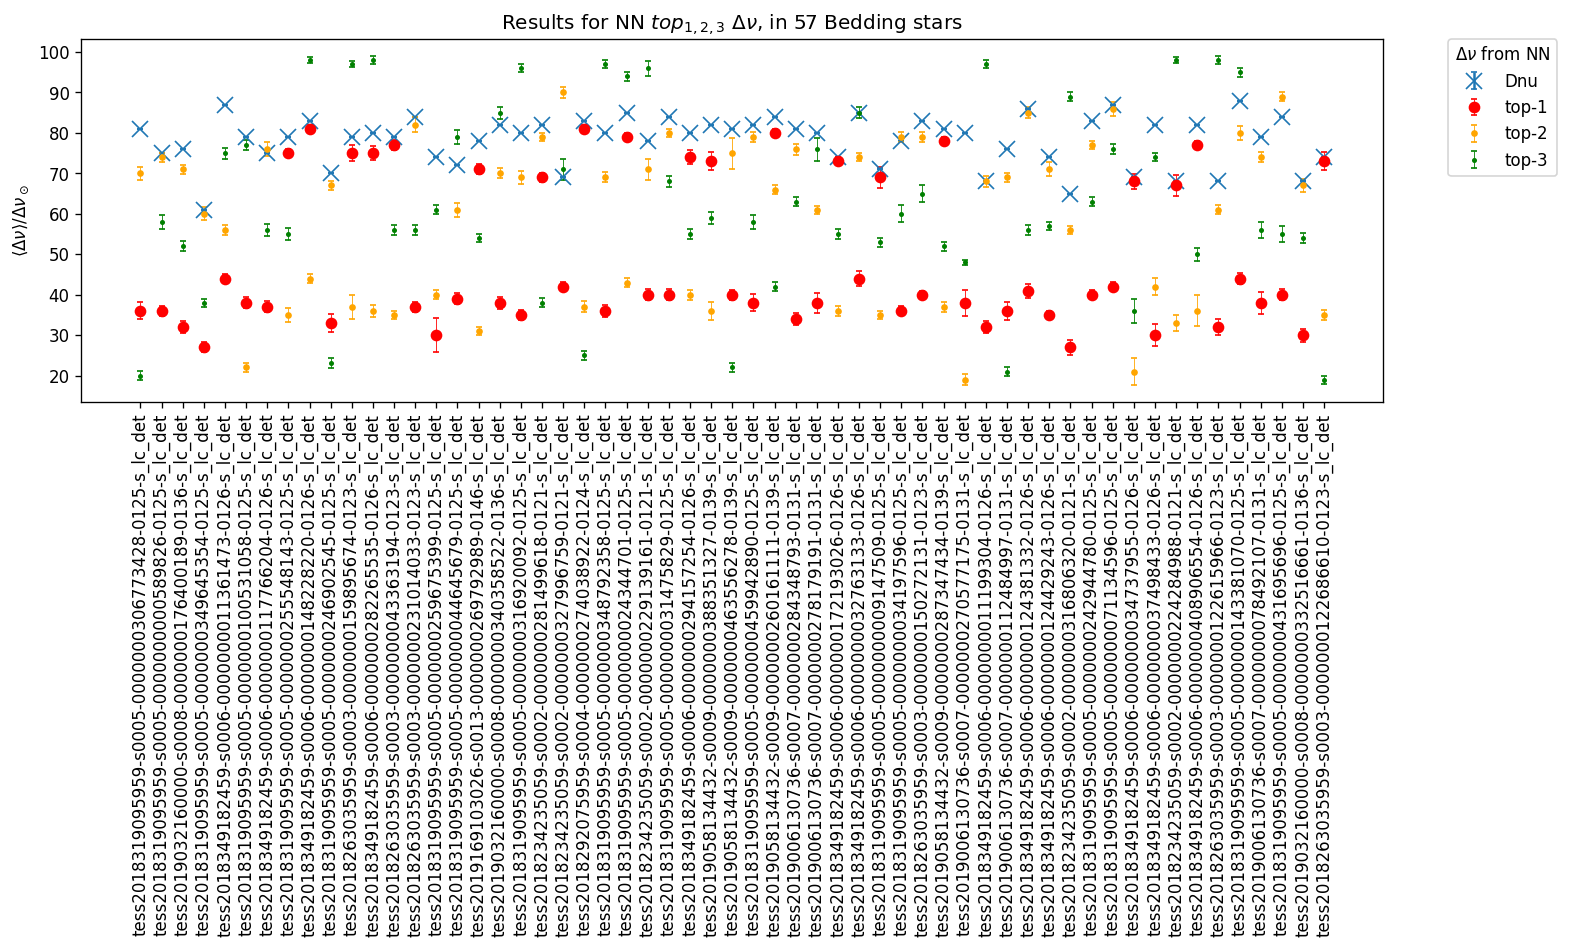

In [17]:
inf.plot_inferences(
    df_results_bedding_merged,
    plot_title="Results for NN $top_{1,2,3}$ $\Delta\\nu$, in 57 Bedding stars",
    plot_size=(14, 4),
)

In [18]:
select_closest_top = np.argmin(
    (
        np.power(
            np.asarray(df_results_bedding["dnu-target"])
            - np.asarray(df_results_bedding["top1"]),
            2,
        ),
        np.power(
            np.asarray(df_results_bedding["dnu-target"])
            - np.asarray(df_results_bedding["top2"]),
            2,
        ),
    ),
    axis=0,
)
tops = np.where(
    select_closest_top == 0, df_results_bedding["top1"], df_results_bedding["top2"]
)

# plt.hist(
#    df_results_bedding.loc[select_closest_top == 1, ["top1"]].values
#    / df_results_bedding.loc[select_closest_top == 1, ["top2"]].values,
#    bins=100,
# )
# plt.show()

In [19]:
df_results_bedding_merged["avg_rho_roche"] = df_results_bedding_merged[
    ["Teff", "L_mast"]
].apply(lambda x: np.average(get_avg_rho_roche(x["Teff"], x["L_mast"])), axis=1)
df_results_bedding_merged.head()

/home/roberto/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/numpy/lib/function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/roberto/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


id dnu-target top1  \
0  tess2018319095959-s0005-0000000306773428-0125-...         81   36   
1  tess2018319095959-s0005-0000000000589826-0125-...         75   36   
2  tess2019032160000-s0008-0000000176400189-0136-...         76   32   
3  tess2018319095959-s0005-0000000349645354-0125-...         61   27   
4  tess2018349182459-s0006-0000000011361473-0126-...         87   44   

     e-top1 top2    e-top2 top3    e-top3 top4    e-top4  ...     logg  \
0  2.120982   70  1.526464   20  1.186996   55  1.374543  ...  4.25396   
1  1.190560   74  1.140826   58  1.795380   21  1.505817  ...  4.32735   
2  1.466002   71  1.159129   52  1.154854   21  1.109137  ...  3.92691   
3  1.230694   60  1.614049   38  0.957913   95  1.052234  ...  4.11525   
4  1.014310   56  1.178350   75  1.373552   90  1.783472  ...  4.47037   

   Teff_mast    e_logg  e_Teff_mast stellar_radius  e_stellar_radius  \
0     7975.0  0.072827      145.016        1.71280          0.051588   
1     7943.0  0.073937      123.979        1.56992          0.040683   
2     7202.0  0.091352      142.357        2.28769          0.119186   
3     7401.0  0.084291      140.628        1.88518          0.068065   
4     9692.0  0.085830      732.909        1.51486          0.065254   

      L_mast   dnu_muhz                                                 ID  \
0  10.691314  81.481481  TESS2018319095959-S0005-0000000306773428-0125-...   
1   8.838681  75.462963  TESS2018319095959-S0005-0000000000589826-0125-...   
2  12.685331  76.851852  TESS2019032160000-S0008-0000000176400189-0136-...   
3   9.606420  61.805556  TESS2018319095959-S0005-0000000349645354-0125-...   
4  18.242876  87.384259  TESS2018349182459-S0006-0000000011361473-0126-...   

   avg_rho_roche  
0            NaN  
1       0.420820  
2            NaN  
3       0.330212  
4       0.375944  

[5 rows x 45 columns]

/home/roberto/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/roberto/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


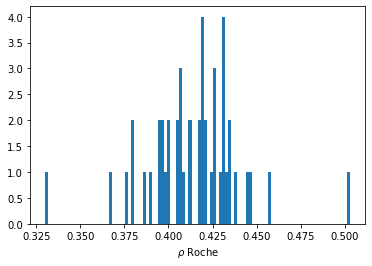

In [20]:
plt.hist(df_results_bedding_merged["avg_rho_roche"], bins=100)
plt.xlabel("$\\rho$ Roche")
plt.show()

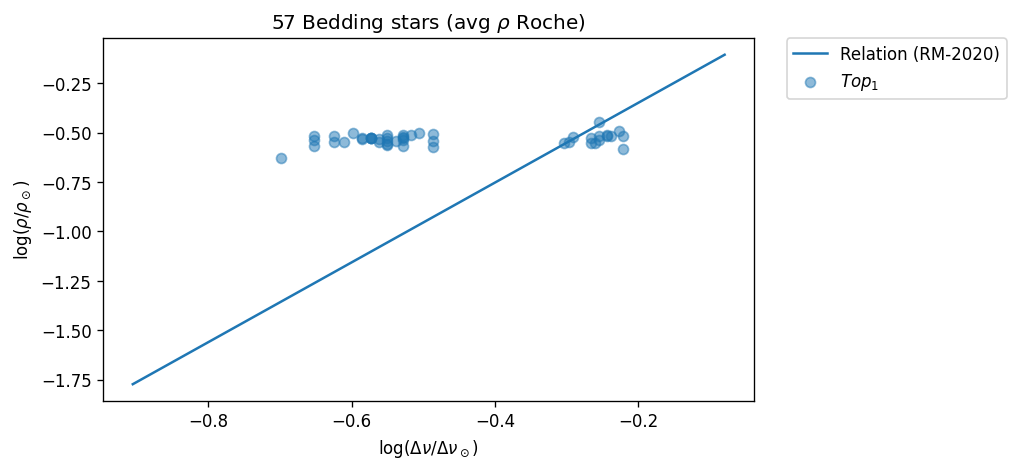

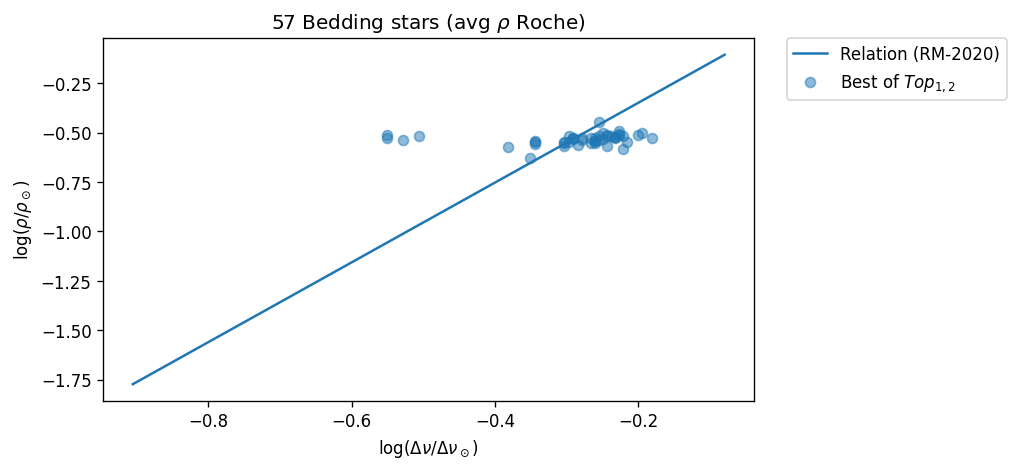

In [21]:
inferences.plot_relation_rodriguez(
    dnus=df_results_bedding_merged["top1"].values.astype(float),
    rhos=df_results_bedding_merged["avg_rho_roche"].values.astype(float),
    points_ids=None,
    plot_title="57 Bedding stars (avg $\\rho$ Roche)",
    points_label="$Top_1$",
)

inferences.plot_relation_rodriguez(
    dnus=tops.astype(float),
    rhos=df_results_bedding_merged["avg_rho_roche"].values.astype(float),
    points_ids=None,
    plot_title="57 Bedding stars (avg $\\rho$ Roche)",
    points_label="Best of $Top_{1,2}$",
)

### Histogram of $\rho$ Roche distributions for every single star (57 Bedding stars)

/home/roberto/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/roberto/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


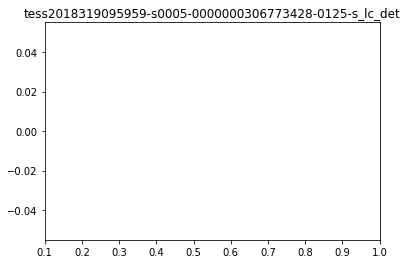

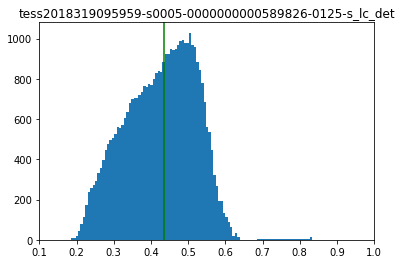

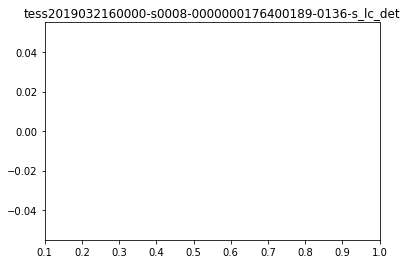

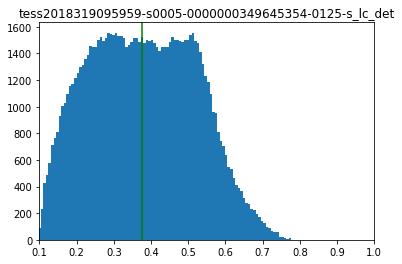

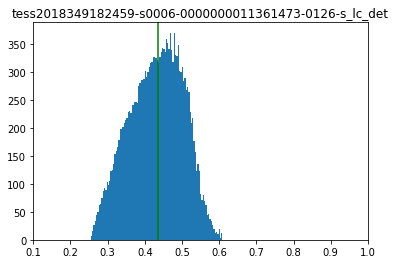

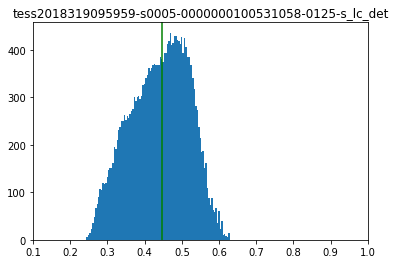

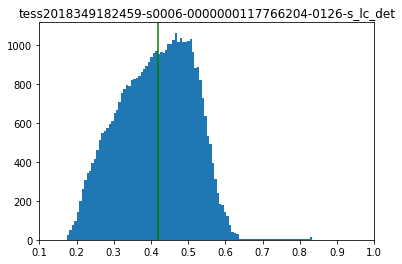

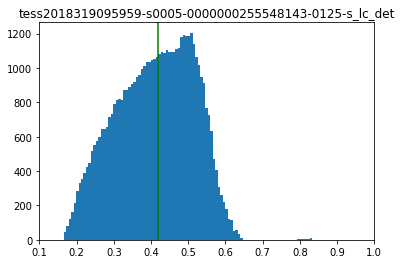

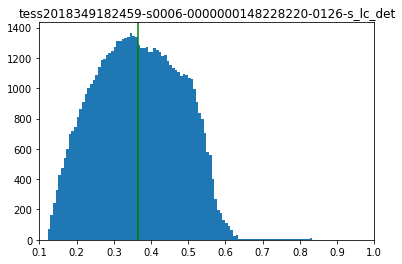

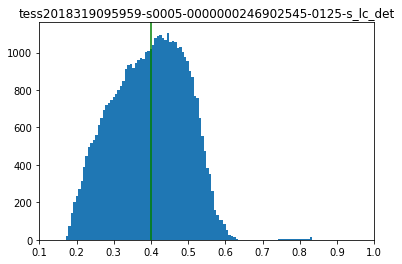

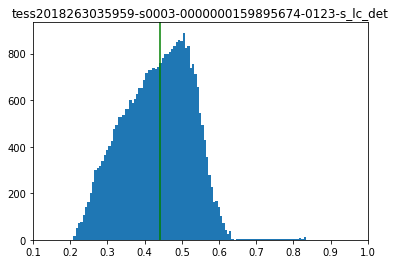

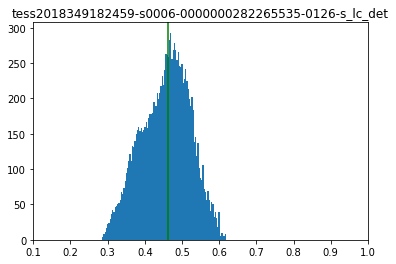

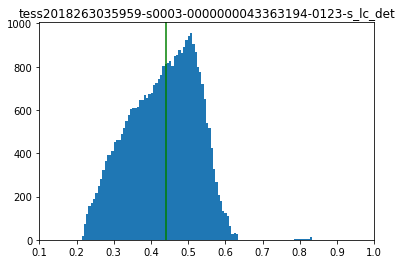

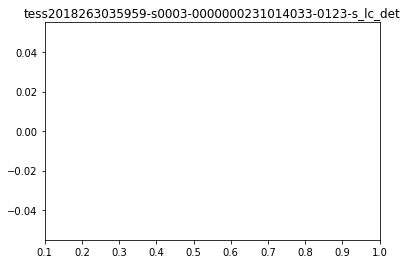

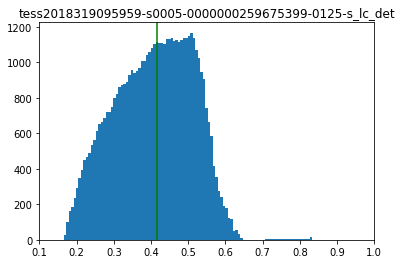

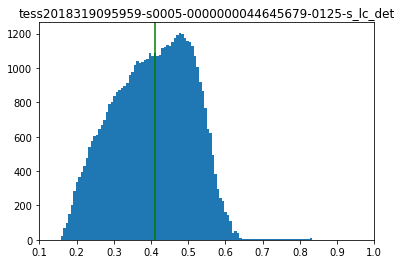

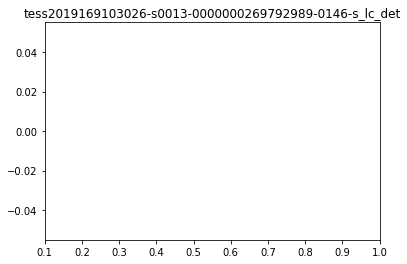

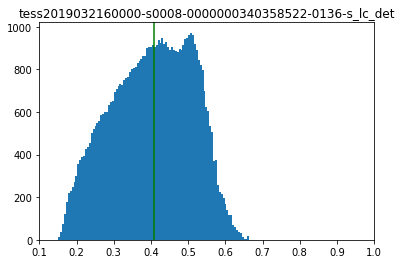

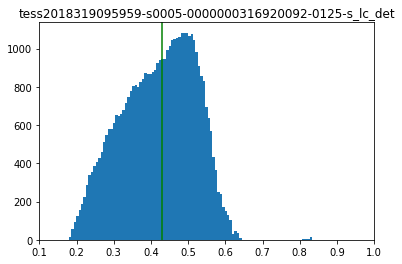

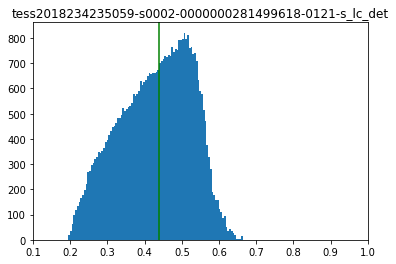

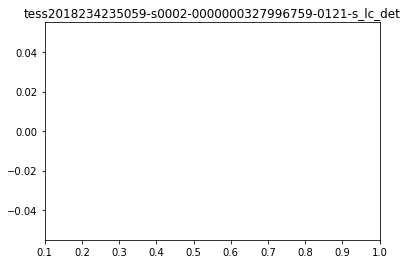

In [22]:
for i, row in df_results_bedding_merged.iterrows():
    avg_rho_roche = np.median(get_avg_rho_roche(row["Teff"], row["L"]))
    plt.hist(get_avg_rho_roche(row["Teff"], row["L"]), bins=100)
    plt.axvline(x=avg_rho_roche, color="green")
    plt.title(row["id"])
    plt.xlim(0.1, 1.0)
    plt.show()
    if i == 20:
        break